In [2]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%pwd

'/home/cseadmin/undergrad1/dz/GISCUP2021/data_process'

In [5]:
link_time_attr=pd.read_csv("../data/link_time_attr.csv")
link_time_attr.set_index('Unnamed: 0',inplace=True)

link_time_attr

,std,avg,min,max,count
Unnamed: 0,,,,,
157298,3.142503,5.023350,0.3210,14.4000,137.0
511622,1.761514,3.837049,0.2957,16.5600,141.0
524542,1.242140,2.905499,0.4696,12.9600,154.0
97293,1.929949,4.649475,2.0020,20.8800,161.0
273845,1.726321,4.192694,2.5297,18.7200,160.0
...,...,...,...,...,...
280667,0.000000,51.000000,51.0000,51.0000,1.0
280020,0.000000,51.000000,51.0000,51.0000,1.0
382296,0.000000,11.582600,11.5826,11.5826,1.0


In [7]:
kmeans_input=link_time_attr["min"].values.reshape(-1, 1)

/home/cseadmin/anaconda3/envs/dz/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/home/cseadmin/anaconda3/envs/dz/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/home/cseadmin/anaconda3/envs/dz/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/home/cseadmin/anaconda3/envs/dz/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings

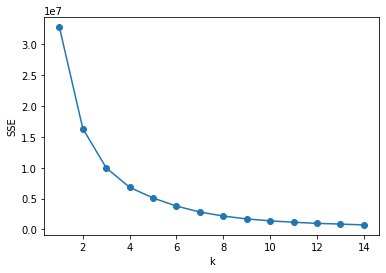

In [8]:
SSE=[]
for k in range(1, 15):
    estimator=KMeans(n_clusters=k)
    estimator.fit(kmeans_input)
    SSE.append(estimator.inertia_)

X=range(1, 15)
plt.xlabel('k')
plt.ylabel('SSE')
plt.plot(X, SSE, 'o-')

plt.show()

In [9]:
kmeans_model=KMeans(n_clusters=9)
kmeans_model.fit(kmeans_input)
link_time_attr["label"]=kmeans_model.labels_

link_time_attr

,std,avg,min,max,count,label
Unnamed: 0,,,,,,
157298,3.142503,5.023350,0.3210,14.4000,137.0,1
511622,1.761514,3.837049,0.2957,16.5600,141.0,1
524542,1.242140,2.905499,0.4696,12.9600,154.0,1
97293,1.929949,4.649475,2.0020,20.8800,161.0,1
273845,1.726321,4.192694,2.5297,18.7200,160.0,4
...,...,...,...,...,...,...
280667,0.000000,51.000000,51.0000,51.0000,1.0,2
280020,0.000000,51.000000,51.0000,51.0000,1.0,2
382296,0.000000,11.582600,11.5826,11.5826,1.0,8


In [10]:
np.unique(link_time_attr["label"])

array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=int32)

In [11]:
link_time_attr.to_csv("./link_time_attr.csv")